Naive Bayes Algorithm-Granularity Classifier

We will use AIPS platform to distinguish between peroxisome-positive and peroxisome-negative cells by imaging GFP-expressing Catalse. To model peroxisomes, we will use Pex13 mutant cells, with GFP-cat signal spread throughout the cytoplasm.

The ```AIPS_cellpose``` module is used for segmenting input image cytoplasmic signal. 
```python
from AIPyS.AIPS_cellpose import granularityMesure_cellpose
```
Segment cells and measure area of each cell which is marked in red. In the cellular level, granularity will be analysed.   
```python

wt, WTtable, WTdf = granularityMesure_cellpose(file = fileNmae[1],path = path, classLabel = 0,
                               outPath = None, clean = None, outputTableName = None,saveMode=False,intensity = 1)

kO, kOtable, kOdf = granularityMesure_cellpose(file = fileNmae[0],path = path, classLabel = 0,
                               outPath = None, clean = None, outputTableName = None,saveMode=False, intensity = 1)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(wt, cmap=plt.cm.gray)
ax[0].title.set_text('WT')
ax[1].imshow(ko, cmap=plt.cm.gray)
ax[1].title.set_text('PEX3KO')

```


F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *
F:\Gil\AIPS_platforms\AIPyS\AIPyS\AIPS_granularity.py:116: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  table_gran_comp = pd.concat((table_, tableColumnNorm), 1)


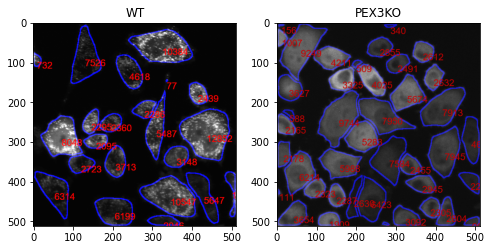

In [1]:
# {code-cell} ipython3
# :tags: [hide-input]

%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")
import seaborn as sns
import tifffile as tfi
import numpy as np
from PIL import Image
from skimage.filters import threshold_local
from scipy.ndimage.morphology import binary_opening
from skimage import io, filters, measure, color, img_as_ubyte
import skimage.morphology as sm
from skimage.segmentation import watershed
from skimage import measure
from skimage.exposure import rescale_intensity
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageEnhance
from skimage import io
import sys
sys.path.append(r'F:\Gil\AIPS_platforms\AIPyS')
from AIPyS import AIPS_file_display as afd
from AIPyS import AIPS_cellpose as AC
from AIPyS.AIPS_cellpose import granularityMesure_cellpose

fileNmae = ['PEX3KO.tif','WT.tif']
path = '/data/kanferg/Images/Pex_project/SIngle_cell_images_training_set/AIPyS_Images'
path = r'F:\Gil\AIPS_platforms\AIPyS\data'
WTcompsiteImage, WTtable, WTdf = granularityMesure_cellpose(file = fileNmae[1],path = path, classLabel = 0,outPath = None, clean = None, outputTableName = None,saveMode=False,intensity = 1,start_kernel=2, end_karnel=60, kernel_size=10)
kOcompsiteImage, kOtable, kOdf = granularityMesure_cellpose(file = fileNmae[0],path = path, classLabel = 0,outPath = None, clean = None, outputTableName = None,saveMode=False, intensity = 1,start_kernel=2, end_karnel=60, kernel_size=10)
# PEX3KO = io.imread(os.path.join(path,fileNmae[0]))
# WT = io.imread(os.path.join(path,fileNmae[1]))
# adjust the brightness
WT = ImageEnhance.Brightness(WTcompsiteImage)
WT_dimmer = WT.enhance(2)
PEX = ImageEnhance.Brightness(kOcompsiteImage)
Pex_dimmer = PEX.enhance(0.8)
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(WT_dimmer, cmap=plt.cm.gray)
ax[0].title.set_text('WT')
ax[1].imshow(Pex_dimmer, cmap=plt.cm.gray)
ax[1].title.set_text('PEX3KO')

The method of analysis of granularity examines the effect of openings of increasing size on images of differing granularity. The volume of the open image is calculated as the sum of all pixels in each step, and the difference in volume between these successive steps is the granular spectrum. This granular spectrum is then normalized to the total volume (integrated intensity) of the image in order to create a diagram that displays how the different sizes of opening affect the images. Phenotype are assigned for training the model. For example, **1** for Pex3-KO and **0** for the WT cells.  

[Text(0.5, 1.0, 'Granularity spectrum plot')]

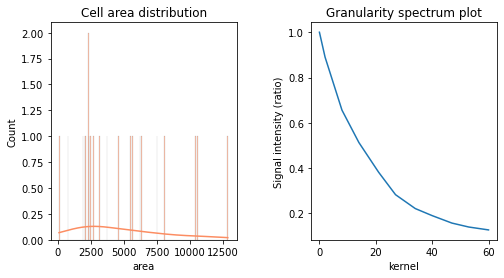

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=WTtable, x='area', kde=True, color=sns.color_palette("Set2")[1], binwidth=50, ax = ax[0]).set(title = 'Cell area distribution')
plt.subplots_adjust(wspace=0.4)
sns.lineplot(data=WTdf, x="kernel", y="Signal intensity (ratio)").set(title='Granularity spectrum plot')